# Analysis of Data from the National Survey on Drug Use and Health (NSDUH)

### Background:

The National Survey on Drug Use and Health (NSDUH) provides up-to-date information on tobacco, alcohol, and drug use, mental health and other health-related issues in the United States.NSDUH began in 1971 and is conducted every year in all 50 states and the District of Columbia. Each year almost 70,000 people are interviewed for this important study. Information from NSDUH is used to support prevention and treatment programs, monitor substance use trends, estimate the need for treatment and inform public health policy.

### Selected Dataset:

Data collected for this analysis include the following elements, grouped into three categories of survey, predictors, and outcomes:

* Survey:
    * weight- Sample weight corresponding to each data point in the survey
* Predictors:
    * gender- 0: male; 1: female
    * age- 0: 12-17 yrs old; 1: 18-25 yrs old; 2: 26-34 yrs old; 3: 35-49 yrs old; 4: 50+
    * race- 0: white; 1: black; 2: other
    * education- 0: less than high school; 1: high school grad; 2: some college/associate degree; 3: college graduate; 4: currently student
    * income (household)- 0: less than 20K; 1: 20K-49.99K; 2: 50k-74.99k; 3: 75K+
    * employment- 0: full time; 1: part time; 2: unemployed; 3: other; 4: not qualified (age between 12-17 years old)
    * govtprog- representing use of government assistance programs, such as food stamps, cash assistance, among others- 0: Yes; 1: No
    * county_type- 0: large metro; 1: small metro; 2: nonmetro
    * insured- 0: yes; 1: no
* Outcomes:
    * opioid- 0: did not misuse opioids in the past year; 1: misused opioids in the past year
    * heroin- 0: did not use heroin in the past year; 1: used heroin in the past year
    * stimulant- 0: did not misuse stimulants (e.g., cocaine, meth) in the past year; 1: misused stimulant in the past year
    * sedative- 0: did not misuse sedatives (e.g., Benzodiazepines) in the past year; 1: misused stimulant in the past year
    

### Analysis methodoloy:

The analysis methodology involves importing data, performing explanatory data analysis, and conducting predictive modeling. Three algorithms of logistic regression, k-nearest neighbors (KNN), and random forest were included in the predictive modeling. These steps, including the Python codes, are discussed in the following.

#### Part (A): Importing data and explanatory data analysis

In [120]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [217]:
# read NSDUH data
nsduh = pd.read_csv('./data/NSDUH.csv')
nsduh.head()

,weight,year,gender,age,race,education,income,employment,county_type,insured,opioid,heroin,stimulant,sedative
0,1088.413235,2015,0,0,0,4,0,4,2,0,0,0,0,0
1,4423.360328,2015,0,3,2,1,1,0,1,0,0,0,0,0
2,328.111801,2015,1,2,0,3,0,3,2,0,0,0,0,0
3,235.290450,2015,1,0,2,4,3,4,1,0,0,0,0,0
4,2280.878615,2015,1,1,0,2,0,3,2,0,0,0,0,0


In [13]:
# describe data
nsduh.describe()

,weight,year,gender,age,race,education,income,employment,county_type,insured,opioid,heroin,stimulant,sedative
count,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000,282768.000000
mean,4803.238875,2016.990791,0.523790,1.781227,0.706042,2.287759,1.663760,1.773832,0.745876,0.098540,0.044754,0.003759,0.029112,0.004990
std,5821.648386,1.415189,0.499435,1.409823,0.886528,1.297072,1.141592,1.676697,0.763896,0.298044,0.206764,0.061198,0.168121,0.070463
min,1.038745,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1267.173729,2016.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2824.857866,2017.000000,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5927.048853,2018.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,119415.350700,2019.000000,1.000000,4.000000,2.000000,4.000000,3.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


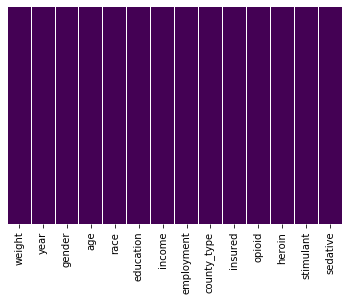

In [4]:
# check and see if there are null values in the dataset (null values will be graphically represented with yellowish color)
sns.heatmap(nsduh.isnull(),yticklabels=False,cbar=False,cmap='viridis');

Let's look at the data to see number of individuals in the survey abusing different drugs

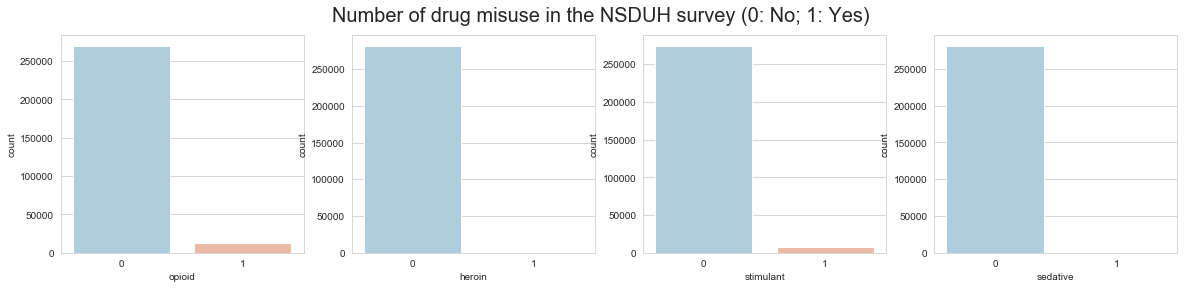

In [233]:
# show the ratios of people in survey misusing drugs
fig, axes = plt.subplots(1, 4, sharex=False)
fig.set_size_inches(20,4)
fig.suptitle('Number of drug misuse in the NSDUH survey (0: No; 1: Yes)',size =20)
sns.set_style('whitegrid')
sns.countplot(ax = axes[0],x='opioid', data=nsduh, palette='RdBu_r');
sns.countplot(ax = axes[1],x='heroin', data=nsduh, palette='RdBu_r');
sns.countplot(ax = axes[2],x='stimulant', data=nsduh, palette='RdBu_r');
sns.countplot(ax = axes[3],x='sedative', data=nsduh, palette='RdBu_r');

Clearly, the dataset in imbalanced so we need to perform downsampling to eliminate the bias.

In [123]:
# downsampling the majority class for each of the selected outcomes
# function to perform downsampling
def downsampling(data,element):
    outcomes = ['opioid','heroin','stimulant','sedative']
    outcomes.remove(element)
    data.drop(columns = outcomes,inplace = True)
    majority = data[data[element] == 0]
    minority = data[data[element] == 1]
    majority_ds = resample(majority,
                          replace = False,
                          n_samples = minority.shape[0],
                          random_state = 123)
    return pd.concat([majority_ds,minority])

# nsduh_opioid downsampled
nsduh_opioid = downsampling(nsduh.copy(),'opioid')
# nsduh_heroin downsampled
nsduh_heroin = downsampling(nsduh.copy(),'heroin')
# nsduh_stimulant downsampled
nsduh_stimulant = downsampling(nsduh.copy(),'stimulant')
# nsduh_sedative downsampled
nsduh_sedative = downsampling(nsduh.copy(),'sedative')

# reseting all indices
nsduh_opioid.reset_index(drop = True,inplace = True)
nsduh_heroin.reset_index(drop = True,inplace = True)
nsduh_stimulant.reset_index(drop = True,inplace = True)
nsduh_sedative.reset_index(drop = True,inplace = True)

Let's look into the impact of selected predictive factors on average prevalence of drug use within the survey population. Here, we focus on opioid and heroin.

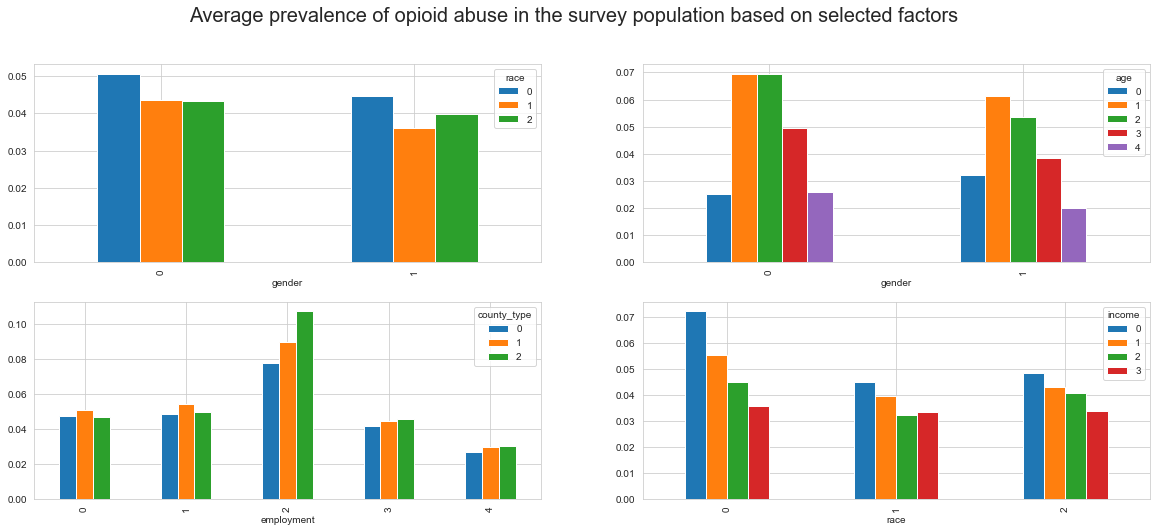

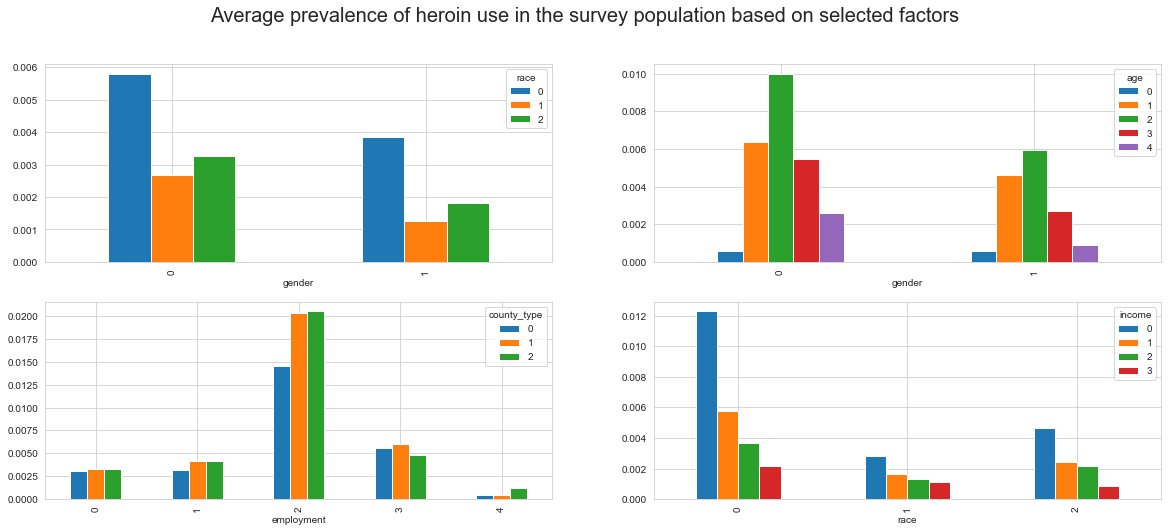

In [243]:
fig1, axes = plt.subplots(2, 2, sharex=False)
fig1.set_size_inches(20,8)
# opioid
fig1.suptitle('Average prevalence of opioid abuse in the survey population based on selected factors',size =20)
nsduh.groupby(['gender','race']).mean()['opioid'].unstack().plot.bar(ax=axes[0,0]);
nsduh.groupby(['gender','age']).mean()['opioid'].unstack().plot.bar(ax=axes[0,1]);
nsduh.groupby(['employment','county_type']).mean()['opioid'].unstack().plot.bar(ax=axes[1,0]);
nsduh.groupby(['race','income']).mean()['opioid'].unstack().plot.bar(ax=axes[1,1]);

fig2, axes = plt.subplots(2, 2, sharex=False)
fig2.set_size_inches(20,8)
# opioid
fig2.suptitle('Average prevalence of heroin use in the survey population based on selected factors',size =20)
nsduh.groupby(['gender','race']).mean()['heroin'].unstack().plot.bar(ax=axes[0,0]);
nsduh.groupby(['gender','age']).mean()['heroin'].unstack().plot.bar(ax=axes[0,1]);
nsduh.groupby(['employment','county_type']).mean()['heroin'].unstack().plot.bar(ax=axes[1,0]);
nsduh.groupby(['race','income']).mean()['heroin'].unstack().plot.bar(ax=axes[1,1]);



#### Part (B): Predictive modeling

Functions used in predictive modeling based on selected machine learning approaches.

In [144]:
def glm_formula(features,interactions,outcome):
    """
    Function to a formula including main effects as well as selected
    interaction effects for the logistic regression model.
    
    Function arguments:
        features: list of explanatory variables defined as strings
        interactions: dictionary of interaction terms defined as {'term i':['x_i','x_j']}
        outcome: model output defined as a string
    """
    formula = outcome + '~'
    for x in features:
        formula = formula + '+C(' + x + ')'
    if (len(interactions.keys()) != 0):
        # interaction terms are included
        for key in interactions.keys():
            # we are only considering two-way interactions in the model
            term_1 = interactions[key][0]
            term_2 = interactions[key][1]
            formula = formula +'+C(' + term_1 + '):C(' + term_2 + ')'
    return formula

def get_Xy(data,features,outcome,dummy_flag):
    """
    Function to extract X and y used for predictive modeling from the dataset
    
    Function arguments:
        data: dataframe including all x's and model outcome (y)
        features: list of explanatory variables defined as strings
        outcome: y variable used in the regression
        dummary_flag: whether categorical features should be transformed to dummy variables- True/False
    """
    if dummy_flag:
        # with dummy features
        binary_features = ['gender','insured']
        # list of dummy features in the dataset
        dummy_features = list(set(features) - set(binary_features))
        # translate categorical features to dummy variables
        dummy_data = pd.get_dummies(data = data[dummy_features], columns = dummy_features,drop_first = True)
        # define X and y 
        X = pd.concat([dummy_data,data[binary_features]],axis = 1)
        y = data[outcome] 
    else:
        # withiut dummy features
        X = data[features]
        y = data[outcome]
    return X,y

def model_accuracy(model_type,**kwargs):
    """
    Function to calculate model accuracy using different machine learning methods. Available options include:
    logistic regression, K-nearest neighbors (KNN), random forest
    
    Function arguments:
    model_type: type of machine learning approach used for calculating model accuracy
    *kwargs: corresponding keyword arguments
        -logistic regression:
            data: dataframe including all x's and model outcome (y). Dataframe also include a weight column representing survey sample weights
            outcome: y variable used in the regression
            n_folds: number of cross-validation folds
            glm_formula: formula used in logistic regression
        -KNN, random forest
            data: dataframe including all x's and model outcome (y)
            outcome: y variable used in the KNN model
            features: list of explanatory variables defined as strings
            n_folds: number of cross-validation folds
            params: set of parameters used for hyperparameter model tuning
    """
    # empty list for model accuracy calculations
    accuracy = []
    if (model_type == "logistic regression"):
        # predictive modeling using logistic regression
        # read function arguments
        data = kwargs['data']
        n_folds = kwargs['n_folds']
        outcome = kwargs['outcome']
        glm_formula = kwargs['glm_formula']
        for i in range (1,n_folds + 1):
            # create random train/test datasets
            train_data = data.sample(round(0.7*data.shape[0]),random_state = i)
            test_data = data[~data.isin(train_data)].dropna(how = 'all')
            glm_results = smf.glm(formula=glm_formula,
                                  data=train_data,
                                  family=sm.families.Binomial(),
                                  freq_weights=train_data.weight).fit()
            
            y_pred_prob = glm_results.predict(test_data.drop(columns = outcome))
            y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
            accuracy.append(accuracy_score(y_pred,test_data[outcome],sample_weight = test_data.weight))
    elif (model_type in ['KNN','random forest'] ):
        # predictive modeling using K-nearest neighbor, random forest
        data = kwargs['data']
        outcome = kwargs['outcome']
        features = kwargs['features']
        n_folds = kwargs['n_folds']
        params =kwargs['params']
        # define X and y
        X,y = get_Xy(data,features,outcome,dummy_flag = True)
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state = 123)
        # perform k-fold cross-validation using randomized search
        kf = KFold(n_splits = n_folds, shuffle = True, random_state = 123)
        if (model_type == 'KNN'):
            model_estimator = KNeighborsClassifier()
        elif (model_type == 'random forest'):
            model_estimator = RandomForestClassifier()
        # use randomized search for the best model fit
        rs = RandomizedSearchCV(
            estimator = model_estimator, 
            param_distributions = params, 
            n_iter = 100, 
            cv = kf, 
            verbose = 0, 
            random_state=123, 
            n_jobs = None
        )
        rs.fit(X_train, y_train)
        # best model parameters based on the search
        best_params = rs.best_params_
        # instantiate the best model
        if (model_type == 'KNN'):
            best_model = KNeighborsClassifier(
                leaf_size = best_params['leaf_size'],
                n_neighbors = best_params['n_neighbors'],
                metric = 'hamming')
        elif (model_type == 'random forest'):
            best_model = RandomForestClassifier(
                n_estimators = best_params['n_estimators'],
                min_samples_split = best_params['min_samples_split'],
                min_samples_leaf = best_params['min_samples_leaf'],
                max_features = best_params['max_features'],
                max_depth = best_params['max_depth'],
                bootstrap = best_params['bootstrap'])
        # fit the best model to the data. We still use kfold cross-validation to obtain a range of model accuracies
        accuracy = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    return accuracy
        

##### (i) Logistic regression

Results from logistic regression for different outcomes (e.g., opioid abuse, heroin use) are listed in the following:

In [140]:
features = ['gender','age','race','education','income','employment','county_type','insured']
interactions = {'1':['gender','age'],'2':['race','income'],'3':['age','race'],'4':['insured','race']}
# opioid misuse model
outcome = 'opioid'
formula = glm_formula(features,interactions,outcome)
LR_opioid_accuracy = model_accuracy('logistic regression',data = nsduh_opioid,outcome = 'opioid',n_folds = 10,glm_formula = formula)
print('Average model accuracy for predicting opioid abuse: {:.3f}'.format(np.mean(LR_opioid_accuracy)))
# heroin use model
outcome = 'heroin'
formula = glm_formula(features,interactions,outcome)
LR_heroin_accuracy = model_accuracy('logistic regression',data = nsduh_heroin,outcome = 'heroin',n_folds = 10,glm_formula = formula)
print('Average model accuracy for predicting heroin use: {:.3f}'.format(np.mean(LR_heroin_accuracy)))
# stimulant abuse model
outcome = 'stimulant'
formula = glm_formula(features,interactions,outcome)
LR_stimulant_accuracy = model_accuracy('logistic regression',data = nsduh_stimulant,outcome = 'stimulant',n_folds = 10,glm_formula = formula)
print('Average model accuracy for predicting stimulant abuse: {:.3f}'.format(np.mean(LR_stimulant_accuracy)))
# sedative abuse model
outcome = 'sedative'
formula = glm_formula(features,interactions,outcome)
LR_sedative_accuracy = model_accuracy('logistic regression',data = nsduh_sedative,outcome = 'sedative',n_folds = 10,glm_formula = formula)
print('Average model accuracy for predicting sedative abuse: {:.3f}'.format(np.mean(LR_sedative_accuracy)))


Average model accuracy for predicting opioid abuse: 0.618
Average model accuracy for predicting heroin use: 0.748
Average model accuracy for predicting stimulant abuse: 0.748
Average model accuracy for predicting sedative abuse: 0.568


##### (ii) K Nearest Neighbors (KNN)

Results from KNN for different outcomes (e.g., opioid abuse, heroin use) are listed in the following:

In [145]:
features = ['gender','age','race','education','income','employment','county_type','insured']
# create random grid
params = {'n_neighbors': np.arange(40) + 1,
          'leaf_size': range(1, 50), 
          'metric' : ['hamming']}
# opioid
KNN_opioid_accuracy = model_accuracy('KNN',data = nsduh_opioid,outcome = 'opioid',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting opioid abuse: {:.3f}'.format(np.mean(KNN_opioid_accuracy)))
# heroin use model
KNN_heroin_accuracy = model_accuracy('KNN',data = nsduh_heroin,outcome = 'heroin',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting heroin use: {:.3f}'.format(np.mean(KNN_heroin_accuracy)))
# stimulant abuse model
KNN_stimulant_accuracy = model_accuracy('KNN',data = nsduh_stimulant,outcome = 'stimulant',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting stimulant abuse: {:.3f}'.format(np.mean(KNN_stimulant_accuracy)))
# sedative abuse model
KNN_sedative_accuracy = model_accuracy('KNN',data = nsduh_sedative,outcome = 'sedative',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting sedative abuse: {:.3f}'.format(np.mean(KNN_sedative_accuracy)))




Average model accuracy for predicting opioid abuse: 0.537
Average model accuracy for predicting heroin use: 0.685
Average model accuracy for predicting stimulant abuse: 0.633
Average model accuracy for predicting sedative abuse: 0.547


##### (iii) Random Forest

Results from Random Forest for different outcomes (e.g., opioid abuse, heroin use) are listed in the following:
    

In [146]:
features = ['gender','age','race','education','income','employment','county_type','insured']
# create random grid
params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)],
          'max_features': ['auto', 'sqrt'],
          'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'bootstrap': [True,False]}
# opioid
RF_opioid_accuracy = model_accuracy('random forest',data = nsduh_opioid,outcome = 'opioid',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting opioid abuse: {:.3f}'.format(np.mean(RF_opioid_accuracy)))
# heroin
RF_heroin_accuracy = model_accuracy('random forest',data = nsduh_heroin,outcome = 'heroin',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting heroin use: {:.3f}'.format(np.mean(RF_heroin_accuracy)))
# stimulants
RF_stimulant_accuracy = model_accuracy('random forest',data = nsduh_stimulant,outcome = 'stimulant',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting stimulant abuse: {:.3f}'.format(np.mean(RF_stimulant_accuracy)))
# sedatives
RF_sedative_accuracy = model_accuracy('random forest',data = nsduh_sedative,outcome = 'sedative',features = features,n_folds = 10,params = params)
print('Average model accuracy for predicting sedative abuse: {:.3f}'.format(np.mean(RF_sedative_accuracy)))

Average model accuracy for predicting opioid abuse: 0.605
Average model accuracy for predicting heroin use: 0.737
Average model accuracy for predicting stimulant abuse: 0.698
Average model accuracy for predicting sedative abuse: 0.581


##### (iv) Compare model performance across selected algorithms

We used he 10-fold cross validation procedure to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way. We can further compare the model accuracies across selected outcomes and algorithms using boxplots.

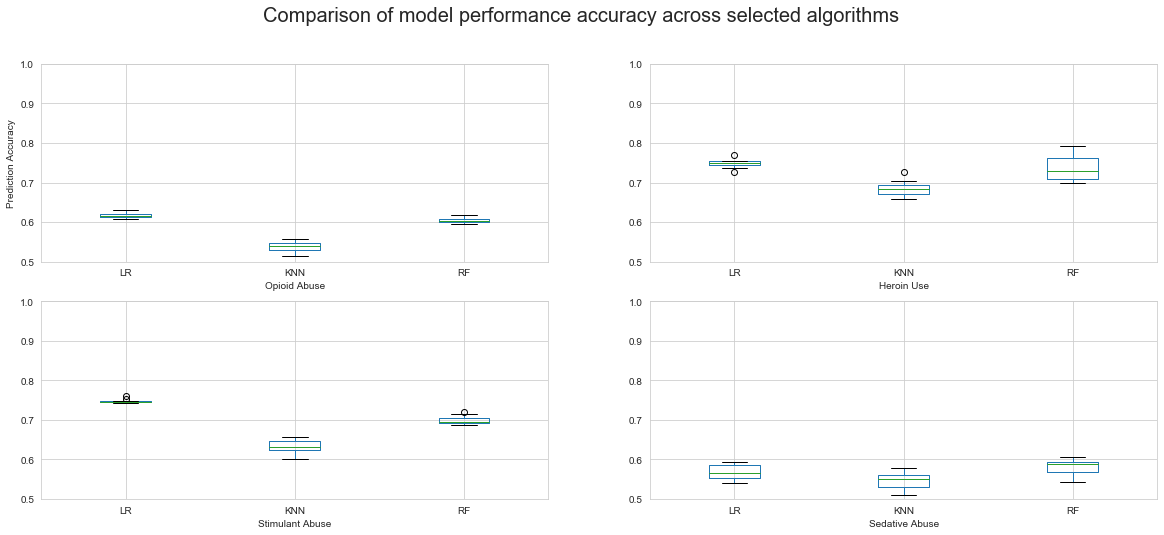

In [247]:
# create datasets representing combined accuracies across selected algorithms
# opioid
opioid_accuracy = pd.DataFrame({'LR':LR_opioid_accuracy,'KNN':list(KNN_opioid_accuracy),'RF':list(RF_opioid_accuracy)})
# heroin
heroin_accuracy = pd.DataFrame({'LR':LR_heroin_accuracy,'KNN':list(KNN_heroin_accuracy),'RF':list(RF_heroin_accuracy)})
# stimulants
stimulant_accuracy = pd.DataFrame({'LR':LR_stimulant_accuracy,'KNN':list(KNN_stimulant_accuracy),'RF':list(RF_stimulant_accuracy)})
# sedatives
sedative_accuracy = pd.DataFrame({'LR':LR_sedative_accuracy,'KNN':list(KNN_sedative_accuracy),'RF':list(RF_sedative_accuracy)})

fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16,8))
fig.set_size_inches(20,8)
fig.suptitle('Comparison of model performance accuracy across selected algorithms',size = 20)
sns.set_style('whitegrid')
# opioid
sp_0 = opioid_accuracy.boxplot(ax = axes[0,0]);
sp_0.set_xlabel("Opioid Abuse");
sp_0.set_ylabel("Prediction Accuracy");
sp_0.set_ylim([0.5,1]);
# heroin
sp_1 = heroin_accuracy.boxplot(ax = axes[0,1]);
sp_1.set_xlabel("Heroin Use");
sp_1.set_ylim([0.5,1]);
# stimulant
sp_2 = stimulant_accuracy.boxplot(ax = axes[1,0]);
sp_2.set_xlabel("Stimulant Abuse");
sp_2.set_ylim([0.5,1]);
# sedative
sp_3 = sedative_accuracy.boxplot(ax = axes[1,1]);
sp_3.set_xlabel("Sedative Abuse");
sp_3.set_ylim([0.5,1]);

Results showed that logistic regression and random forest had comparable accuracies while KNN demonstrated lower accuracies. Furthermore, model performance was the best when predicting heroin use and stimulant abuse.

##### (v) Multi-class classification problem

Using Random Forest, we want to also investigate if we can predict a multi-class classification based on the following criteria:
- 0: No drug use
- 1: Opioid only abuse
- 2: Heroin only use
- 3: Stimulant only abuse
- 4: Sedative only abuse
- 5: Poly-drug abuse (e.g., simultaneous abuse of two or more drugs such as opioid and heroin)

First, let's create a new scoring column based on the criteria defined above:

In [211]:
# add a summation column
nsduh['sum'] = nsduh.opioid + nsduh.heroin + nsduh.stimulant + nsduh.sedative
# creat new column representing scores between 0 and 5
conditions = [
    (nsduh['sum'] == 0),
    (nsduh['opioid'] == 1) & (nsduh['sum'] == 1),
    (nsduh['heroin'] == 1) & (nsduh['sum'] == 1),
    (nsduh['stimulant'] == 1) & (nsduh['sum'] == 1),
    (nsduh['sedative'] == 1) & (nsduh['sum'] == 1),
    (nsduh['sum'] > 1)
]

choices = ['0','1','2','3','4','5']
nsduh['drug_use'] = np.select(conditions, choices, default=np.nan)
# drop redundant columns
dropped_columns = ['opioid','heroin','stimulant','sedative','sum']
nsduh.drop(columns = dropped_columns,inplace = True)
nsduh['drug_use'].value_counts()

0    263539
1      9270
3      5504
5      3545
4       624
2       286
Name: drug_use, dtype: int64

We already know the dataset is not balanced from the previous step. Considering the size of opioid abusers (9,270 samples as the baseline, let's downsample non-users with no replacement while upsample other drug abusers with replacement. The resulting dataframe will be balanced with respect to all drug use scores (i.e., 0-5 scores).

In [212]:
# downsampling the majority class (non-users)
majority = nsduh[nsduh['drug_use'] == '0']
minority = nsduh[nsduh['drug_use'] != '0']
majority_ds = resample(majority,
                       replace = False,
                       n_samples = 9270,
                       random_state = 123)
minority_opioid = nsduh[nsduh['drug_use'] == '1']
minority_heroin = resample(nsduh[nsduh['drug_use'] == '2'],
                       replace = True,
                       n_samples = 9270,
                       random_state = 123)
minority_stimulant = resample(nsduh[nsduh['drug_use'] == '3'],
                       replace = True,
                       n_samples = 9270,
                       random_state = 123)
minority_sedative = resample(nsduh[nsduh['drug_use'] == '4'],
                       replace = True,
                       n_samples = 9270,
                       random_state = 123)
minority_poly = resample(nsduh[nsduh['drug_use'] == '5'],
                       replace = True,
                       n_samples = 9270,
                       random_state = 123)
nsduh_ds = pd.concat([majority_ds,minority_opioid,minority_heroin,minority_stimulant,minority_sedative,minority_poly])
nsduh_ds.reset_index(drop = True,inplace = True)

Using Random Forest to predict multi-class drug-use classification:

In [215]:
# get X, y including training and testing datasets
X,y = get_Xy(nsduh_ds,features,outcome = 'drug_use',dummy_flag = True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state = 123)
# perform k-fold cross-validation using randomized search
kf = KFold(n_splits = 10, shuffle = True, random_state = 123)
model_estimator = RandomForestClassifier()
# use randomized search for the best model fit
rs = RandomizedSearchCV(
    estimator = model_estimator, 
    param_distributions = params, 
    n_iter = 100, 
    cv = kf, 
    verbose = 0, 
    random_state=123, 
    n_jobs = None)
rs.fit(X_train, y_train)
# best model parameters based on the search
best_params = rs.best_params_
# instantiate the best model
best_model = RandomForestClassifier(
    n_estimators = best_params['n_estimators'],
    min_samples_split = best_params['min_samples_split'],
    min_samples_leaf = best_params['min_samples_leaf'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'],
    bootstrap = best_params['bootstrap'])
accuracy = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')


In [216]:
print('Average model accuracy for predicting multi-class drug abuse: {:.3f}'.format(np.mean(accuracy)))

Average model accuracy for predicting multi-class drug abuse: 0.506
